<a href="https://colab.research.google.com/github/rex-yue-wu/Notebooks/blob/master/opencvDeepFaceDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/mmilovec/facedetectionOpenCV.git

Cloning into 'facedetectionOpenCV'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38
Unpacking objects: 100% (38/38), done.


In [4]:
! ls

facedetectionOpenCV  sample_data


In [0]:
# importing necessary packages
import numpy as np
import cv2
import os
from matplotlib import pyplot

opencv_face_detection_dir = './facedetectionOpenCV/'

def initialize_caffe_face_detector(prototxt=None, model=None) :
    if (prototxt is None) :
        prototxt = os.path.join(opencv_face_detection_dir, 'deploy.prototxt.txt')
        model = os.path.join(opencv_face_detection_dir, 'res10_300x300_ssd_iter_140000.caffemodel')
    net = cv2.dnn.readNetFromCaffe(prototxt, model)
    return net

def preprocess_image(image) :
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))
    return blob

def caffe_face_detection(net, image, thresh=0.5) :
    (h, w) = image.shape[:2]
    blob = preprocess_image(image)
    net.setInput(blob)
    detections = net.forward()
    face_xywh_bboxes = []
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > thresh:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            xmin, ymin = startX, startY
            wbox, hbox = endX-startX, endY-startY
            face_xywh_bboxes.append([xmin, ymin, wbox, hbox])
    return face_xywh_bboxes

def visualize_caffe_face_detector(image, face_xywh_bboxes, show=False) :
    debug = np.array(img)
    for xmin, ymin, wbox, hbox in face_xywh_bboxes :
        pt1 = (xmin, ymin)
        pt2 = (xmin+wbox, ymin+hbox)
        cv2.rectangle(debug, pt1, pt2, (0,255,0),5)
    if show :
        pyplot.imshow(debug)
        pyplot.show()
    return debug

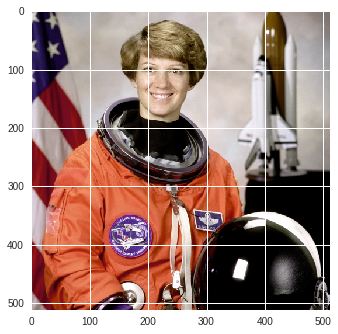

In [17]:
from skimage.data import astronaut

img = astronaut()
pyplot.figure()
pyplot.imshow(img)


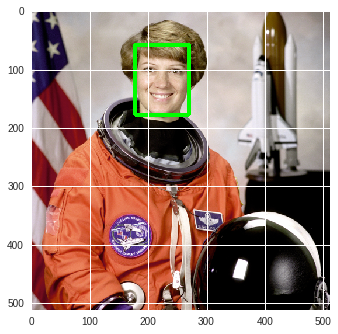

In [18]:
net = initialize_caffe_face_detector()
bboxes = caffe_face_detection(net, img)
img_face = visualize_caffe_face_detector(img, bboxes)
pyplot.figure()
pyplot.imshow(img_face)